In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from textblob import TextBlob
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [42]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Elon_musk.csv']))

In [43]:
df.head()

Unnamed: 0                                               Text
0           1                             @kunalb11 I’m an alien
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2           3                @joerogan @Spotify Great interview!
3           4                    @gtera27 Doge is underestimated
4           5  @teslacn Congratulations Tesla China for amazi...

In [44]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [45]:
df.rename({'Text':'Tweets'},axis=1,inplace=True)

In [46]:
df.columns

Index(['Tweets'], dtype='object')

In [47]:
len(df)

1999

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [49]:
df.duplicated().sum()

2

In [50]:
df[df.duplicated(keep=False)]

Tweets
9    The most entertaining outcome is the most likely
139                             @westcoastbill Indeed
324  The most entertaining outcome is the most likely
655                             @westcoastbill Indeed

In [51]:
df.drop_duplicates(keep='first',inplace=True)

In [52]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [Tweets]
Index: []

In [53]:
# clean the text

# creating a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)    # removed @mentions
  text = re.sub(r'#', '', text)                # removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text)          # removing retweets
  text = re.sub(r'https?:\/\/\S+', '', text)   # remove the hyperlink

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

# show the cleaned text
df.head(10)

Tweets
0                                       I’m an alien
1  _AA_Carmack Ray tracing on Cyberpunk with HDR ...
2                                   Great interview!
3                             Doge is underestimated
4   Congratulations Tesla China for amazing execu...
5                         Happy New Year of the Ox! 
6  Frodo was the underdoge,\nAll thought he would...
7                                 _   Haha thanks :)
8    Indeed! Tweets definitely do not represent r...
9   The most entertaining outcome is the most likely

In [54]:
# create a function to get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# create two new columns

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df.head(10)

Tweets  Subjectivity  Polarity
0                                       I’m an alien      0.750000 -0.250000
1  _AA_Carmack Ray tracing on Cyberpunk with HDR ...      0.000000  0.000000
2                                   Great interview!      0.750000  1.000000
3                             Doge is underestimated      0.000000  0.000000
4   Congratulations Tesla China for amazing execu...      0.366667  0.345313
5                         Happy New Year of the Ox!       0.727273  0.485227
6  Frodo was the underdoge,\nAll thought he would...      0.400000  0.000000
7                                 _   Haha thanks :)      0.500000  0.300000
8    Indeed! Tweets definitely do not represent r...      0.500000  0.000000
9   The most entertaining outcome is the most likely      0.675000  0.375000

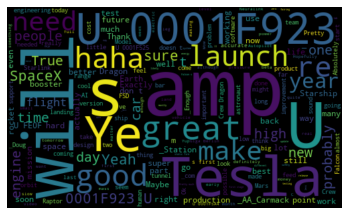

In [57]:
# plot the WordCloud

allWords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=0, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [62]:
# create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.head(10)

Tweets  Subjectivity  Polarity  \
0                                       I’m an alien      0.750000 -0.250000   
1  _AA_Carmack Ray tracing on Cyberpunk with HDR ...      0.000000  0.000000   
2                                   Great interview!      0.750000  1.000000   
3                             Doge is underestimated      0.000000  0.000000   
4   Congratulations Tesla China for amazing execu...      0.366667  0.345313   
5                         Happy New Year of the Ox!       0.727273  0.485227   
6  Frodo was the underdoge,\nAll thought he would...      0.400000  0.000000   
7                                 _   Haha thanks :)      0.500000  0.300000   
8    Indeed! Tweets definitely do not represent r...      0.500000  0.000000   
9   The most entertaining outcome is the most likely      0.675000  0.375000   

   Analysis  
0  Negative  
1   Neutral  
2  Positive  
3   Neutral  
4  Positive  
5  Positive  
6   Neutral  
7  Positive  
8   Neutral  
9  Positive

In [69]:
df = df.reset_index()

In [70]:
# print all the negative tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j=j+1

1)  Great interview!

2) Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!

3)Happy New Year of the Ox! 

4)_   Haha thanks :)

5)The most entertaining outcome is the most likely

6)  It’s getting real

7) He definitely has issues, but the sentencing seems a bit high

8) Thanks for fixing

9)This is true power haha 

10): NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission! 

11)  _ Once we can predict cash flow reasonably well, Starlink will IPO

12)  Does seem a bit high

13)  Wow

14)_7_42  So cute <U+0001F495>

15) Extremely misleading image, as doesn’t reflect true time cost to people or rain &amp; pain

16) It’s the most fun crypto!

17) True

18)  Not that easy. This is two decades of intense work. Have to look at old notes, emails, texts.

19) Have you read ? It’s great!!

20)_ Sure

21)The great thing about restaurants is that you get to hang out with strangers! - SJM

22)Muc

In [71]:
# print all the negative tweets

j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j+1

1)  I’m an alien

2)  Your app sucks

3)  _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don… 

4)  _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or… 

5)  Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

That’s what you’re missing.

6)  Doge appears to be inflationary, but is not meaningfully so (fixed  of coins per unit time), whereas… 

7)   It was foolish of us not to start 3 engines &amp; immediately shut down 1, as 2 are needed to land

8)  We were too dumb

9) This was a tough one 

10) : This mission enables access for everyday people who dream of going to space

11) _feed Earth is small &amp; we are smaller still 

12)  _Ryan A little

13) _7TeslaNews  Yeah, probably in a few months

14)  After you drive without using a PRND stalk/stick for a few days, it gets very annoying to go back &amp; use a shifter!

15)  No more stalks. Car guesses drive

In [72]:
# print all the neutral tweets

j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if( sortedDF['Analysis'][i] == 'Neutral'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j+1

1) _AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?

2)  Doge is underestimated

3) Frodo was the underdoge,
All thought he would fail,
Himself most of all. 

4)   Indeed! Tweets definitely do not represent real-world time allocation.

5)  Just sent some

6) Just agree to do Clubhouse with 

7) 

8) Bought some Dogecoin for lil X, so he can be a toddler hodler

9)  Please unlock my account

10)  <U+0001F923><U+0001F923>

11)  Any crypto wallet that won’t give you your private keys should be avoided at all costs

12)  Yes

13) _AA_Carmack Lowest cost per ton of carbon sequestered, net of value of any product made. 

Must be scalable to g… 

14) _ It’s meant to be the same price in all countries. Only difference should be taxes &amp; shipping.

15)  This is intended for Earth, but there may be some ideas that apply to Mars too

16)    _Z_Palmer <U+0001F923><U+0001F923>

17) XPrize team will manage the $100M carbon capture prize 

18) Back to work I go …

19

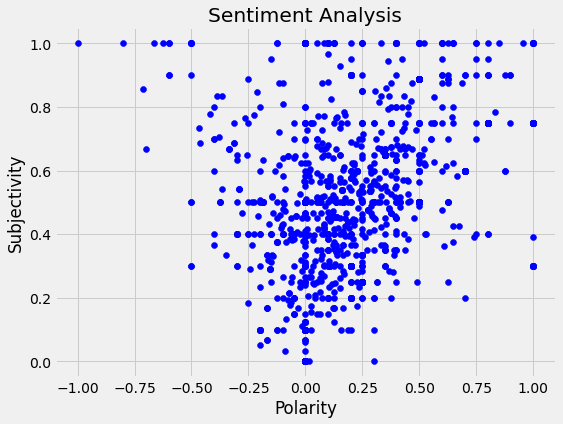

In [76]:
## plot polarity and subjectivity

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'] 
    [i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

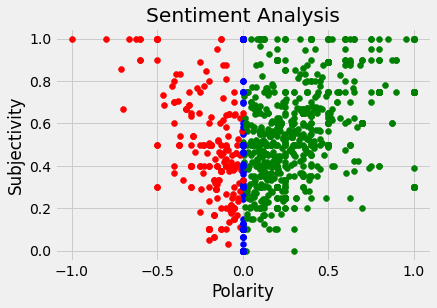

In [77]:
for index,row in df.iterrows():
    if row['Analysis']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Analysis']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    else:
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

<font color='magenta'><b>Red dots represents negetive tweets, Green dots represents positive tweets and remaining blue dots are neutral tweets.

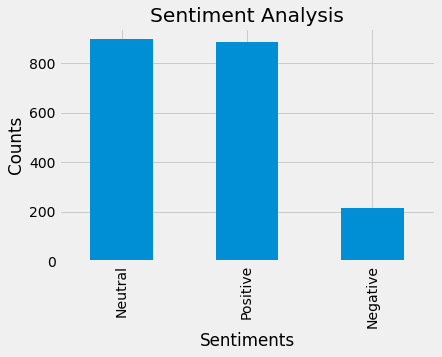

In [78]:
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1)
## get percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
round((ntweets.shape[0]/df.shape[0])*100,1)
## show value counts
df['Analysis'].value_counts()
## plot visulatisation of count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments') 
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()